Make simple 2-axis plot and test linearity of stage position values vs **real** vlaues

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Sample data
#x = [10000,20000,30000,40000,100000,150000,200000,500000,1000000,1500000]
x = [0,2,4,6,8,10]
#y = [0.2894, 0.5788,0.8682,1.1576, 2.8939, 4.3409,5.7879, 14.4697,28.9394,43.4091]
y = [0,2.888,7.72,12.56,17.40,22.24]


# Plotting the first set of data
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Fit a function, in this case check the values above for linearity

In [ ]:
def fit_lin(x,a,b):
    return a*x+b

popt, _ = curve_fit(fit_lin, x,y)
a = popt[0]
b = popt[1]
a_inv = 1/a
print(1/a)
print(1/b)
print(f"a: {popt[0]}  b: {popt[1]}")
print(x/a_inv)
print(y)


How to write to a list lol

In [ ]:
import time
duration = []
for i in range(10):
    start_time = i+45
    duration.append([i, start_time])
    time.sleep(1)
    print(time.time())

print(duration)

How to read in the textfile, access 1st, 2nd 3rd elements and convert to array

In [ ]:
from datetime import datetime
import ast 

positions_file = open("test_file.txt", "r")
data = ast.literal_eval(positions_file.read())
print(data)
first_elements = [sublist[0] for sublist in data]
print(first_elements)

print(datetime.now())


How to use real timing

In [40]:
from datetime import datetime
import time

list =[]
now = datetime.now()
time.sleep(1)
later = datetime.now()

for i in range(10):
    list.append([i,datetime.now()])
    time.sleep(0.5*i+0.2)

with open("xx.txt", "w") as output:
    output.write(str(list))


This is how real timing can be read out of .txt file <br>
And how to print with timing


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


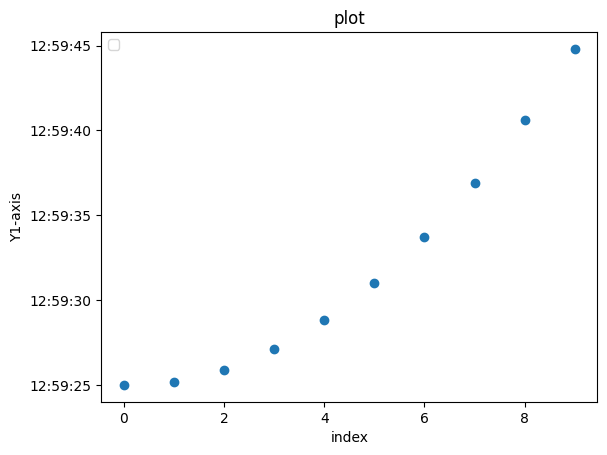

In [56]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("xx.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta")
data = eval(data)

# col0 = [sublist[0] for sublist in data]
# print(col0)       # access column
# print(col0[0])    # acces element of column

# col1 = [sublist[1] for sublist in data]
# print(col1)       # access column
# print(col1[0])    # acces element of column

index = [sublist[0] for sublist in data]            # index doesnt make much sense in this context
timing = [sublist[1] for sublist in data]

# Plotting the first set of data
plt.scatter(index, timing)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Plot position when triggered over time, test whether the is exactly x seconds difference (whilst trigger with Arduino is set in a constant manner) 

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("test_file.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = eval(data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))

timing = [sublist[0].total_seconds() for sublist in data]            # index doesnt make much sense in this context
position = [sublist[2] for sublist in data]

print(timing)
print(position)

# Plotting the first set of data
plt.scatter(timing, position)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test_file.txt'

How many events were actually 1s


In [1]:
print(timing)
print(len(timing))

diff_timing = [None for _ in range(len(timing)-1)]
x = [None for _ in range(len(timing)-1)]

for i in range(len(timing)-1):
    diff_timing[i] = timing[i+1]-timing[i]
    x[i] = i
print(diff_timing)
plt.scatter(x, diff_timing)
plt.ylim(0,6)
plt.show()

NameError: name 'timing' is not defined

Prepare data from Arduino and Stage to be read out and plotted
This is for one long array

In [9]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

arg = "ccc"

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

# convert stage data 
stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
print(len(stage_data))

timing = [sublist[0].total_seconds() for sublist in stage_data]            # index doesnt make much sense in this context
position_fw = [sublist[1] for sublist in stage_data]
position_bw = [sublist[2] for sublist in stage_data]

# Safely evaluate the string as a Python expression
arduino_data = ast.literal_eval(arduino_data)
x = [None for _ in range(len(arduino_data))]
print(len(arduino_data))

# Convert strings to integers
ard_data_int = [[int(value) for value in sublist] for sublist in arduino_data]
reed_f0 = [sublist[0] for sublist in ard_data_int]
reed_f1 = [sublist[1] for sublist in ard_data_int]
reed_b0 = [sublist[2] for sublist in ard_data_int]
reed_b1 = [sublist[3] for sublist in ard_data_int]
reed_b2 = [sublist[4] for sublist in ard_data_int]




2


AttributeError: 'list' object has no attribute 'total_seconds'

Plot all Reed Movable Back 

In [ ]:
import matplotlib

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
matplotlib.rc('axes', labelsize=SMALL_SIZE) 
matplotlib.rc('ytick', labelsize=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=SMALL_SIZE)

#fig.constrained_layout()

fig.suptitle('Reed Movable Front')
ax[0,0].step(position_fw,reed_f0[0:len(position_fw)])
ax[0,0].set_title('Forward movement F0', size=SMALL_SIZE)
ax[0,1].step(position_fw,reed_f1[0:len(position_fw)])
ax[0,1].set_title('Forward movement F1', size=SMALL_SIZE)
ax[1,0].step(position_bw,reed_f0[0:len(position_bw)])
ax[1,0].set_title('Backwards movement F0', size=SMALL_SIZE)
ax[1,1].step(position_bw,reed_f1[0:len(position_bw)])
ax[1,1].set_title('Backwards movement F1', size=SMALL_SIZE)


for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')

================================================

In [6]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

arg = "27009"
rounds = 200

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
stage_data = stage_data[1:len(stage_data)]  

arduino_data = ast.literal_eval(arduino_data)
arduino_data = arduino_data[1:len(arduino_data)]            # shorten data because of errorous first round 
arduino_data = [[[int(v) for v in value] for value in sublist] for sublist in arduino_data]     # convert to int

####### Examples 
# Round one data               
round1_stage = stage_data[0]
round1_ard = arduino_data[0]
# fw stage 
position_bw_r1 = [sublist[1] for sublist in round1_stage]
# reed F0 data 
reed_f0_r1 = [sublist[0] for sublist in round1_ard]


Print all Reed Back

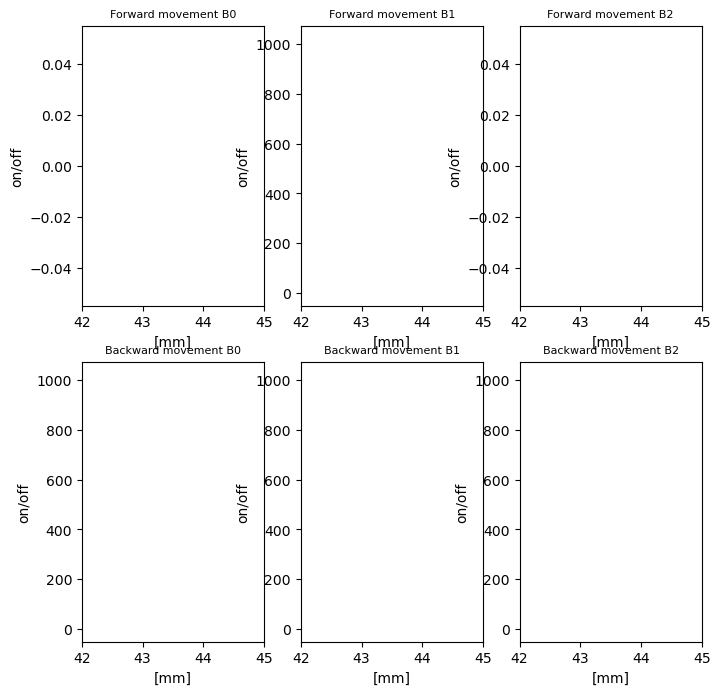

In [4]:
import matplotlib 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

fig, ax = plt.subplots(2,3, figsize=(8,8))

matplotlib.rc('axes', labelsize=SMALL_SIZE) 
matplotlib.rc('ytick', labelsize=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=SMALL_SIZE)

 # [f0, f1, b0, b1, b2], [fw, bw, other]
for i in range(rounds-1):
    # alle fw rounds von b0
    ax[0,0].step([sublist[0] for sublist in stage_data[i]], [sublist[2] for sublist in arduino_data[i]])
    # alle bw rounds von b0 
    ax[1,0].step([sublist[1] for sublist in stage_data[i]], [sublist[2] for sublist in arduino_data[i]]) 
     # alle fw rounds von b1
    ax[0,1].step([sublist[0] for sublist in stage_data[i]], [sublist[3] for sublist in arduino_data[i]])
    # alle bw rounds von b1
    ax[1,1].step([sublist[1] for sublist in stage_data[i]], [sublist[3] for sublist in arduino_data[i]])     # alle fw rounds von b1
    # alle fw rounds von b2   
    ax[0,2].step([sublist[0] for sublist in stage_data[i]], [sublist[4] for sublist in arduino_data[i]])
    # alle bw rounds von b2
    ax[1,2].step([sublist[1] for sublist in stage_data[i]], [sublist[4] for sublist in arduino_data[i]])


ax[0,0].set_title('Forward movement B0', size=SMALL_SIZE)
ax[1,0].set_title('Backward movement B0', size=SMALL_SIZE)
ax[0,1].set_title('Forward movement B1', size=SMALL_SIZE)
ax[1,1].set_title('Backward movement B1', size=SMALL_SIZE)
ax[0,2].set_title('Forward movement B2', size=SMALL_SIZE)
ax[1,2].set_title('Backward movement B2', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')
    #axis.set_xticks([35,37,39,41,43,45])
    axis.set_xlim([42,45])

plt.show() 

Print all Reed Front 

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(8, 8))

 # [f0, f1, b0, b1, b2], [fw, bw, other]
for i in range(rounds-1):
    # alle fw rounds von f0
    ax[0,0].step([sublist[0] for sublist in stage_data[i]], [sublist[0] for sublist in arduino_data[i]])
    # alle bw rounds von f0 
    ax[1,0].step([sublist[1] for sublist in stage_data[i]], [sublist[0] for sublist in arduino_data[i]]) 
     # alle fw rounds von f1
    ax[0,1].step([sublist[0] for sublist in stage_data[i]], [sublist[1] for sublist in arduino_data[i]])
    # alle bw rounds von f1
    ax[1,1].step([sublist[1] for sublist in stage_data[i]], [sublist[1] for sublist in arduino_data[i]])     # alle fw rounds von b1


ax[0,0].set_title('Forward movement F0', size=SMALL_SIZE)
ax[1,0].set_title('Backward movement F0', size=SMALL_SIZE)
ax[0,1].set_title('Forward movement F1', size=SMALL_SIZE)
ax[1,1].set_title('Backward movement F1', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')
    axis.set_xlim([42.5,44.5])

    
plt.show() 

Check, if arduino_data is complete !!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


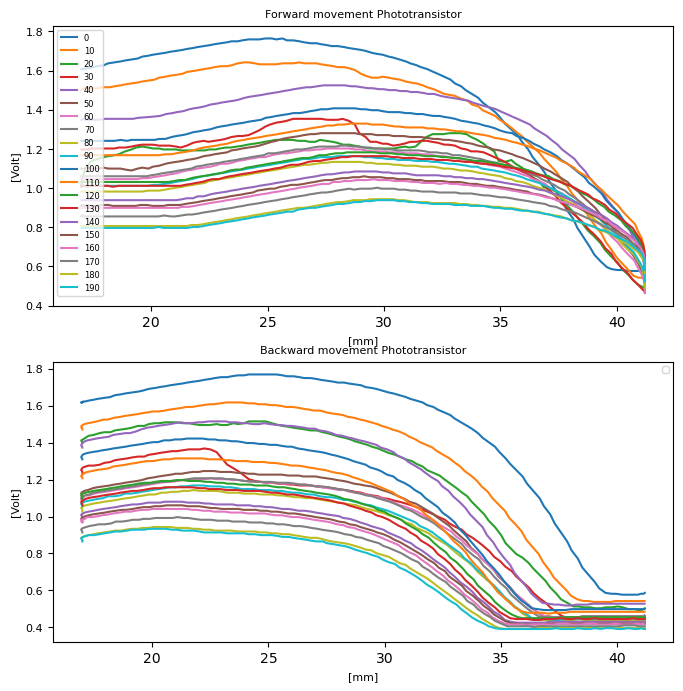

In [30]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))

 # [f0, f1, b0, b1, b2, pd], [fw, bw, at end, at start]

i=0
while i < rounds-1:
    # alle fw rounds von photosensitive

    a = [sublist[0] for sublist in stage_data[i]]
    #print(len(a))
    

    pd_value_inside = [sublist[5] for sublist in arduino_data[i]]

    volt = 5.0/1023.0
    pd_value_inside_volt = [val * volt for val in pd_value_inside]


    ax[0].plot([sublist[0] for sublist in stage_data[i]], pd_value_inside_volt, label=i)
    ax[1].plot([sublist[1] for sublist in stage_data[i]], pd_value_inside_volt)    

    i=i+10 

ax[0].set_title('Forward movement Phototransistor', size=SMALL_SIZE)
ax[1].set_title('Backward movement Phototransistor', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='[Volt]')   
    axis.legend(loc='best', fontsize=6)
plt.show() 

Plot rest over time

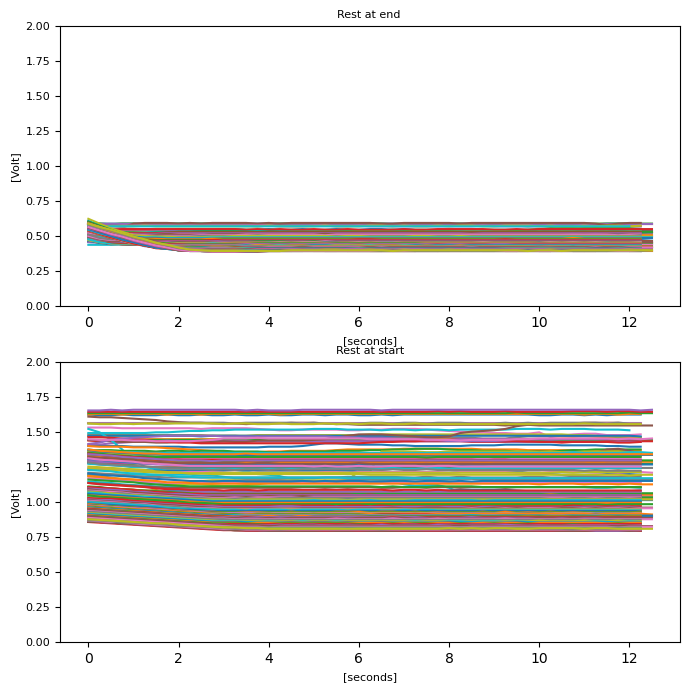

In [8]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))

 # [f0, f1, b0, b1, b2, pd], [fw, bw, at end, at start]
for i in range(rounds-1):
    # alle fw rounds von photosensitive
    pd_value = [sublist[5] for sublist in arduino_data[i]]
    volt = 5.0/1023.0
    pd_value_volt = [val * volt for val in pd_value]

    at_end = [sublist[2] for sublist in stage_data[i]]
    at_start = [sublist[3] for sublist in stage_data[i]]

    at_end_list =[]
    at_start_list = []
    for i in range(len(at_end)):
        if at_end[i] != None:
            at_end_list.append(pd_value_volt[i])
        if at_start[i] != None:
            at_start_list.append(pd_value_volt[i])

    x_end = [i*0.25 for i in range(len(at_end_list))]
    x_start = [i*0.25 for i in range(len(at_start_list))]
    
    ax[0].plot(x_end, at_end_list)
    ax[1].plot(x_start, at_start_list)

ax[0].set_title('Rest at end ', size=SMALL_SIZE)
ax[1].set_title('Rest at start', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[seconds]', ylabel='[Volt]')  
    axis.set_ylim([0.0,2.0])


plt.show() 

In [ ]:
elements_with_less_than_5 = []
arduino_data = arduino_data[1:len(arduino_data)]

for i, sublist in enumerate(arduino_data):
    for j, subsublist in enumerate(sublist):
        if len(subsublist) != 6:
            elements_with_less_than_5.append((i, j))

print("Elements with less than 5 elements in their sublists:")
for element in elements_with_less_than_5:
    print(element)

Print entire round (values of PT over increasing x)

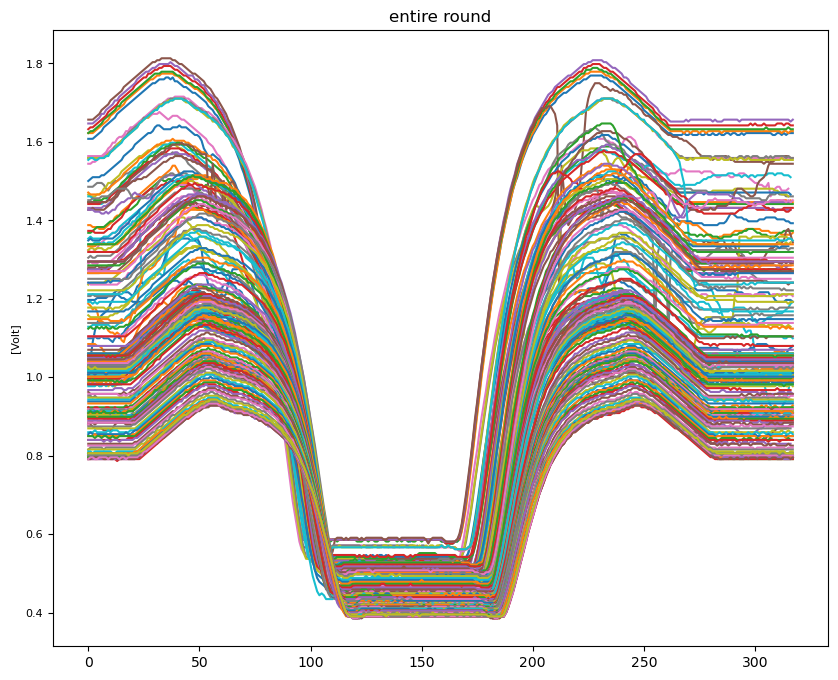

In [26]:
plt.figure(figsize=(10,8))


i=0
while i < rounds-1:
    pd_value_inside = [sublist[5] for sublist in arduino_data[i]]

    volt = 5.0/1023.0
    pd_value_inside_volt = [val * volt for val in pd_value_inside]
    x = [i for i in range (0, len(pd_value_inside_volt))]

    plt.plot(x, pd_value_inside_volt)

    i=i+1 

plt.ylabel('[Volt]')
plt.title('entire round')
plt.show() 

In [13]:
import numpy as np

arr1 = np.arange(1, x + 1)
arr2 = [i for i in range(1, x + 1)]

print(arr1)
print(arr2)


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
